In [1]:
import numpy as np
# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-white')
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 18


# Exemple d'algorithme glouton d'allocations de bits 

In [2]:
c = np.pi * np.e/6  #1.423289037112261

In [37]:
N = 50  # number of channels of Y in the base following a gaussian distrib
rng = np.random.default_rng()
mu, sigma = 3.,1.
Dm = c * rng.lognormal(mu, sigma, N)   # Distostion  of each  gaussian distrib

In [38]:
Dm_orig = Dm.copy()

In [39]:
bits = np.zeros_like(Dm)   # bits array

In [40]:
R=100   # constraint: total number of bits to allocate

In [41]:
# Algorthime glouton
while np.sum(bits) < R:         # while there is some bits to allocate 
    m = np.argmax(Dm)       # select the channel which has the biggest distortion error
    bits[m] +=1                 # increase the number of bits to this channel
    Dm[m] /= 4.             # decrease the channel distortion

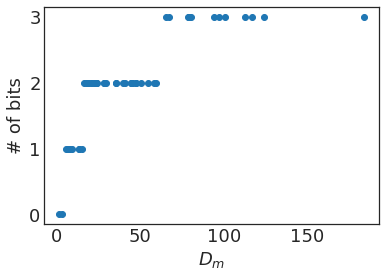

In [42]:
# Show the bits allowed for each channel
plt.scatter(Dm_orig,bits);
plt.xlabel(r"$D_m$")
plt.ylabel("# of bits");

In [47]:
# The total distortion from the allocated bits
D_algo = np.sum(Dm)
# Optimised  total distortion 
D_optim = N*(np.product(Dm_orig)/(4**R))**(1./N)

In [48]:
print(fr"D_optim = {D_optim:.3f}, D_algo = {D_algo:.3f}, eff: {D_optim/D_algo:.3f}")

D_optim = 94.205, D_algo = 101.706, eff: 0.926
